In [ ]:
import sys
import os
import matplotlib.pyplot as plt

# Add the parent directory A to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

try:
    # Import from the TA_analyzer folder
    from TA_Analyzer.ta_analyzer_core import tamatrix_importer, load_spectra, polyfit

    print("Load from TA_Analyzer folder")
except ImportError:
    from ta_analyzer_core import tamatrix_importer

    print("Load from current folder")

Load from TA_Analyzer folder


Get traces


In [7]:
'''
def traces(name,file_num,row_num):
    tatime0 = load_tatime(name+str(1))
    np.savetxt(name+"_tatime", tatime0, fmt="%f", delimiter="\t")
    for i in range(file_num):
        data_file = np.loadtxt(name+str(i+1))
        row = data_file[row_num,2:]
        np.savetxt(name+"_row"+str(row_num)+"kinetic_"+str(i+1), row, fmt="%f", delimiter="\t")
'''

'\ndef traces(name,file_num,row_num):\n    tatime0 = load_tatime(name+str(1))\n    np.savetxt(name+"_tatime", tatime0, fmt="%f", delimiter="\t")\n    for i in range(file_num):\n        data_file = np.loadtxt(name+str(i+1))\n        row = data_file[row_num,2:]\n        np.savetxt(name+"_row"+str(row_num)+"kinetic_"+str(i+1), row, fmt="%f", delimiter="\t")\n'

The number of time points taken as background: 25


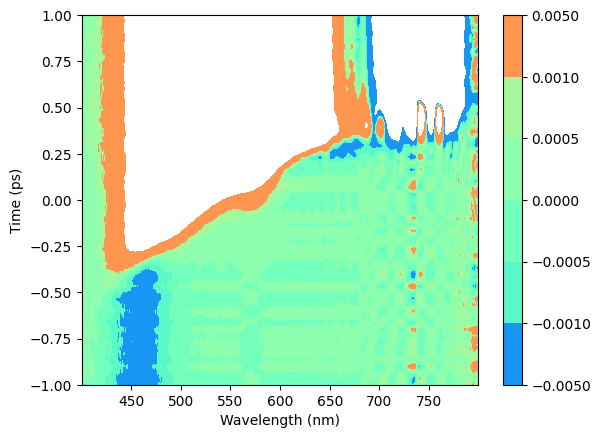

Fitting: 100%|██████████| 945/945 [00:09<00:00, 97.50it/s] 

Parameters([('a', <Parameter 'a', value=-252862.27008949927, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=1.0, bounds=[-inf:inf]>), ('c', <Parameter 'c', value=0.9367441384612823, bounds=[-inf:inf]>)])


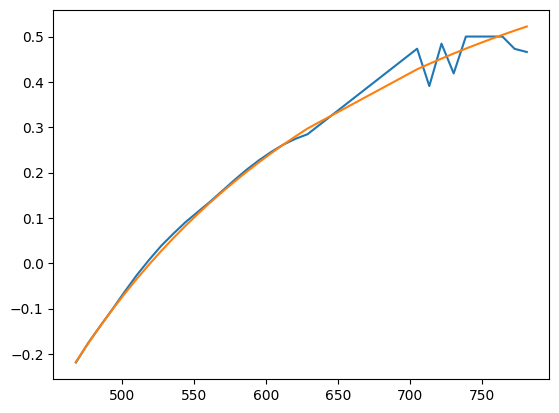

Parameters([('a', <Parameter 'a', value=-249629.1829142316, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=1.0, bounds=[-inf:inf]>), ('c', <Parameter 'c', value=0.9348486090813999, bounds=[-inf:inf]>)])


array([[-1.09698819e-04, -1.09698819e-04, -1.09698819e-04, ...,
        -7.20927999e-05,  1.17539173e-04, -2.17680813e-04],
       [-2.76632492e-04, -2.76632492e-04, -2.76632492e-04, ...,
         1.00434875e-05,  7.78921287e-05, -1.48088137e-04],
       [-4.04849317e-04, -4.04849317e-04, -4.04849317e-04, ...,
        -7.35451226e-05,  1.93858161e-04,  1.50072557e-04],
       ...,
       [-1.61186489e-03, -5.10195129e-04, -6.57862505e-04, ...,
         5.00995819e-03,  4.56720693e-03,  5.12433600e-03],
       [-1.24394844e-03, -8.25919395e-04, -4.38883637e-04, ...,
         5.15919848e-03,  4.64675358e-03,  5.28077600e-03],
       [-4.37398271e-04, -4.59217197e-04, -1.71016531e-04, ...,
         4.86856131e-03,  4.75815488e-03,  5.03056000e-03]])

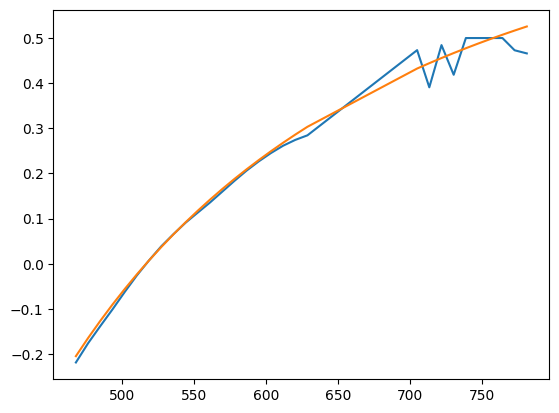

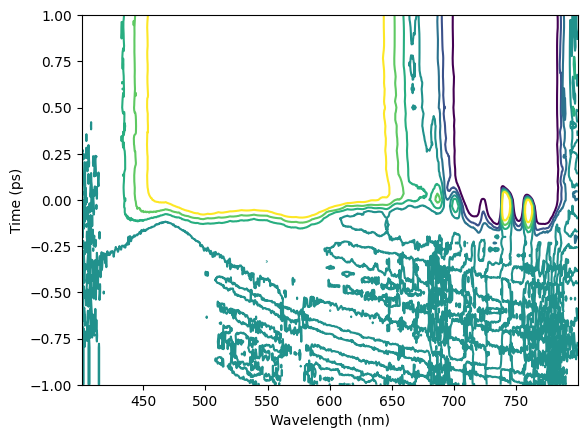

In [4]:
tamatrix = tamatrix_importer(filename='NIR800',startnm=400,endnm=800) 
tamatrix.auto_bgcorr(25)
tamatrix.fit_correlation(3)
line = tamatrix.t0_list
plt.plot(line[0],line[1])
fit = polyfit(line[1],line[0],line[2])
plt.plot(line[0],fit)
tamatrix.auto_tcorr_fit()



NIR800_tawavelength has been saved

NIR800_tatime has been saved

NIR800_tamatrix has been saved



c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:1472: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:1619: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[array([ 1.73148701e-04, -7.29204110e-05,  6.16721895e-05,  5.00069583e-05,
        -2.44268122e-06, -4.47961390e-05,  6.33844635e-05, -1.16036189e-04,
         4.63266372e-05,  1.13226438e-04, -7.16408248e-05, -1.29212670e-04,
        -8.43565660e-05,  2.02000248e-04, -1.20664998e-04, -1.71869305e-04,
        -1.01055676e-04, -5.16224599e-05,  1.34484845e-04,  1.93016020e-04,
         9.64476905e-05,  6.59411976e-05,  2.66290730e-04,  2.11300515e-04,
         6.16359004e-04,  8.41139909e-04,  1.28153394e-03,  3.12082640e-03,
         7.75742925e-03,  1.94037996e-02,  3.77710937e-02,  5.81788770e-02,
         7.21000840e-02,  7.95077574e-02,  8.14676624e-02,  8.19438692e-02,
         8.37222331e-02,  8.29206082e-02,  8.13687193e-02,  8.25182700e-02,
         8.22924875e-02,  8.19287565e-02,  8.24518593e-02,  8.30901309e-02,
         8.35603884e-02,  8.35011383e-02,  8.23136896e-02,  8.23737100e-02,
         8.28668338e-02,  8.32962833e-02,  8.31198168e-02,  8.33505321e-02,
         8.3

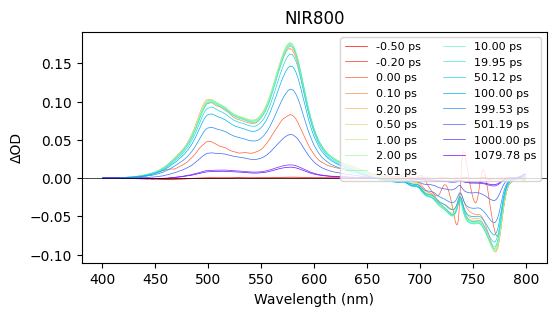

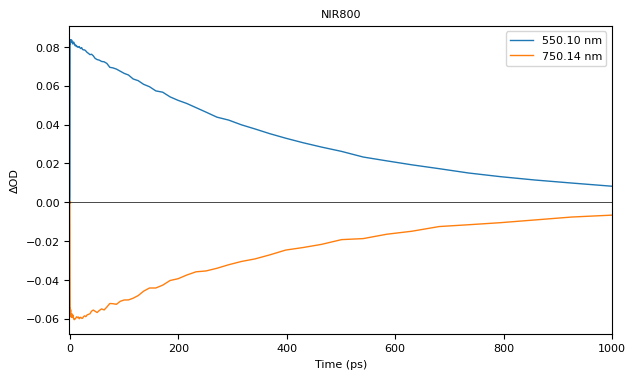

In [5]:
tamatrix.save_all()
tamatrix.auto_taspectra()
tamatrix.auto_takinetics(wavelength_pts=[550,750],tmax=1000)

Parameters([('a', <Parameter 'a', value=np.float64(-249629.1829142316), bounds=[-inf:inf]>), ('b', <Parameter 'b', value=np.float64(1.0), bounds=[-inf:inf]>), ('c', <Parameter 'c', value=np.float64(0.9348486090813999), bounds=[-inf:inf]>)])


array([[-1.09698819e-04, -1.09698819e-04, -1.09698819e-04, ...,
        -7.11196068e-05,  1.16764489e-04, -2.16415414e-04],
       [-2.76632492e-04, -2.76632492e-04, -2.76632492e-04, ...,
         1.05259214e-05,  7.76145572e-05, -1.47235767e-04],
       [-4.04849317e-04, -4.04849317e-04, -4.04849317e-04, ...,
        -7.21609186e-05,  1.92765731e-04,  1.50240550e-04],
       ...,
       [-1.00033769e-03, -1.76358416e-03, -1.63173103e-05, ...,
         5.01010884e-03,  4.56703290e-03,  5.12433600e-03],
       [-9.94496846e-04, -1.29455507e-03, -6.31336251e-04, ...,
         5.15936886e-03,  4.64656003e-03,  5.28077600e-03],
       [-3.98410288e-04, -4.43364298e-04, -4.65672652e-04, ...,
         4.86859745e-03,  4.75807365e-03,  5.03056000e-03]])

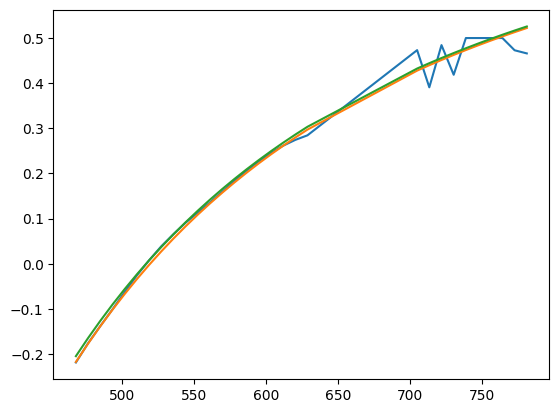

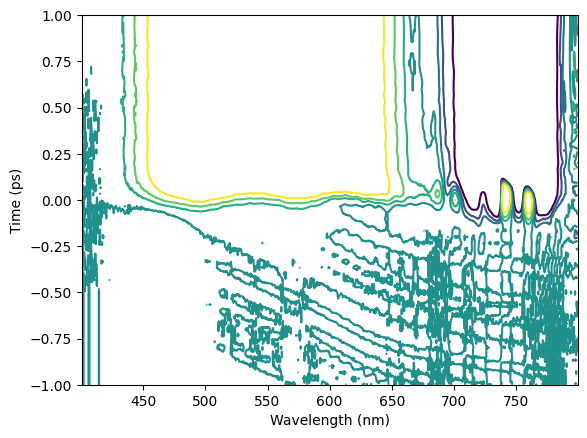

In [3]:
plt.plot(line[0],line[1])
plt.plot(line[0],line[2])
fit = polyfit(line[1],line[0],line[2])
plt.plot(line[0],fit)
tamatrix.auto_tcorr('NIR800_line')

c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:196: RuntimeWarning: divide by zero encountered in log
  np.log(self.tatime),
c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:196: RuntimeWarning: invalid value encountered in log
  np.log(self.tatime),
c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:203: RuntimeWarning: divide by zero encountered in log
  np.log(self.tatime),
c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:203: RuntimeWarning: invalid value encountered in log
  np.log(self.tatime),
c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:190: RuntimeWarning: divide by zero encountered in log
  np.log(self.tatime), self.trace_avg, label=f"{wavelength} nm trace"
c:\Users\kentc\OneDrive - University of Rochester\

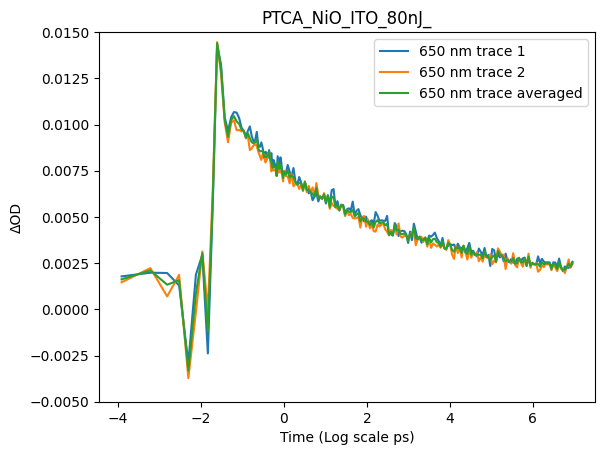

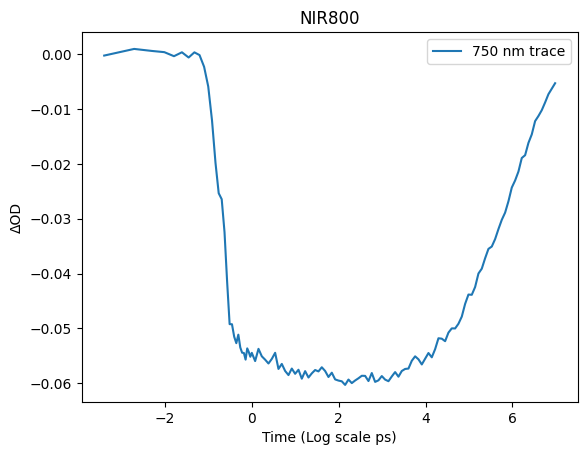

In [4]:
# load data into objects and plot
ptca_nio_ito_80nj = load_spectra('PTCA_NiO_ITO_80nJ_', 2)

k_ptca_650nm = ptca_nio_ito_80nj.get_traces(650)  # get traces at 650 nm


ptca_nio_ito_80nj.ax_k.set_ylim(-0.005, 0.015)

#ptca_nio_ito_80nj.get_1ps()
NIR800 = load_spectra('NIR800')

k_NIR800_800nm = NIR800.get_traces(750)

C:\Users\Kent\AppData\Local\Temp\ipykernel_36540\1369786811.py:4: RuntimeWarning: invalid value encountered in divide
  y = (-np.log10((3000+x)/3000))/(-np.log10((2500+x)/2500))


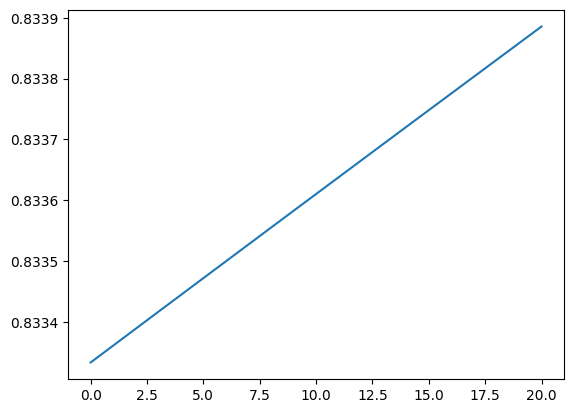